#### Part 3: 
#### This data set is looking at Weather Data collected over a few years. The data set is not totally ready for analysis as there are some outliers that need to be handled. 

#### After this is done, I will prepare the validation, training and test sets

The '2_Weather_Proc' data set includes details of ~460 different monthly time periods, recorded at the Change Climate Station. Here are the fields:

| Field          | Description|
|----------------|--------------------------------------------------------|
| Year-month                | Month and Year of Data Point                |
| temp_mean_daily_min       | The monthly and annual mean daily minimum temperature                                                               |
| temp_extremes_min         | The absolute extreme minimum air temperature|
| temp_mean_daily_max       | The monthly and annual mean daily maximum temperature                                                               |
| mean_temp                 | The monthly mean air temperature            |
| max_temperature           | The monthly extreme maximum air temperature |
| mean_sunshine_hrs         | The monthly mean sunshine hours in a day    |
| wet_bulb_temperature      | The hourly wet bulb temperature             |
| maximum_rainfall_in_a_day | The highest daily total rainfall            |
| total_rainfall            | The total monthly rainfall                  |
| rh_extremes_minimum       | The absolute extreme minimum relative humidity                                                                  |
| mean_rh                   | The monthly mean relative humidity          |
| no_of_rainy_days          | The number of rain days (day with rainfall amount of 0.2mm or more)                                                  |

### Import Libraries

In [1]:
# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


### Load Data from CSV File

In [2]:
df_pre_proc = pd.read_csv('2_Weather_Proc.csv')
print(df_pre_proc.shape)
print(df_pre_proc.info())
df_pre_proc.describe(include='all')

(459, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year-month                 459 non-null    object 
 1   temp_mean_daily_min        459 non-null    float64
 2   temp_extremes_min          459 non-null    float64
 3   temp_mean_daily_max        459 non-null    float64
 4   mean_temp                  459 non-null    float64
 5   max_temperature            459 non-null    float64
 6   mean_sunshine_hrs          459 non-null    float64
 7   wet_bulb_temperature       459 non-null    float64
 8   maximum_rainfall_in_a_day  459 non-null    float64
 9   total_rainfall             459 non-null    float64
 10  rh_extremes_minimum        459 non-null    float64
 11  mean_rh                    459 non-null    float64
 12  no_of_rainy_days           459 non-null    float64
dtypes: float64(12), object(1)
memory usage: 

,Year-month,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,no_of_rainy_days
count,459,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
unique,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1988-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11.454466,22.631155,31.520479,27.658824,33.377778,5.677560,22.283435,52.381046,175.912636,50.708061,82.485403,13.943355
std,NaN,12.550231,0.749825,0.873491,0.806431,0.818019,1.210542,8.248878,35.797789,113.573097,5.559696,3.343576,4.950966
min,NaN,0.000000,20.200000,28.800000,25.400000,31.300000,2.700000,0.000000,0.200000,0.200000,33.000000,72.000000,1.000000
25%,NaN,0.000000,22.100000,31.000000,27.100000,32.800000,4.800000,24.721438,30.500000,88.850000,47.000000,80.650000,11.000000
50%,NaN,0.000000,22.600000,31.500000,27.700000,33.300000,5.600000,25.236156,43.400000,158.400000,51.000000,82.800000,14.000000
75%,NaN,25.100000,23.100000,32.100000,28.300000,33.900000,6.450000,25.641333,63.250000,237.900000,55.000000,84.800000,18.000000


In [3]:
df_pre_proc.head(5)

,Year-month,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,no_of_rainy_days
0,1982-01-01,0.0,21.9,29.8,25.9,31.9,5.6,0.0,36.5,107.1,49.0,81.2,10.0
1,1982-02-01,0.0,22.6,32.3,27.1,34.3,7.6,0.0,9.4,27.8,49.0,79.5,5.0
2,1982-03-01,0.0,22.3,31.7,27.2,34.3,5.1,0.0,61.7,160.8,51.0,82.3,11.0
3,1982-04-01,0.0,22.2,31.4,27.0,33.2,4.7,0.0,45.1,157.0,54.0,85.9,14.0
4,1982-05-01,0.0,23.7,31.7,28.0,32.9,5.8,0.0,33.0,102.2,57.0,83.2,10.0


In [4]:
df_pre_proc.tail(5)

,Year-month,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,no_of_rainy_days
454,2019-11-01,25.4,22.9,32.3,28.0,34.4,5.5,25.128194,73.4,137.4,45.0,79.2,15.0
455,2019-12-01,24.6,22.7,30.1,26.7,32.3,4.8,24.581317,74.2,421.5,47.0,83.9,14.0
456,2020-01-01,25.2,23.8,31.7,27.7,32.8,7.1,24.690726,38.0,88.4,43.0,77.9,6.0
457,2020-02-01,25.3,23.7,31.7,27.9,33.1,8.3,24.543391,23.8,65.0,45.0,76.0,8.0
458,2020-03-01,25.9,24.1,32.9,28.6,34.0,7.6,25.122581,47.4,108.8,44.0,75.2,8.0


### Dealing with outliers

In [5]:
(df_pre_proc == 0).astype(int).sum(axis=0)

Year-month                     0
temp_mean_daily_min          250
temp_extremes_min              0
temp_mean_daily_max            0
mean_temp                      0
max_temperature                0
mean_sunshine_hrs              0
wet_bulb_temperature          55
maximum_rainfall_in_a_day      0
total_rainfall                 0
rh_extremes_minimum            0
mean_rh                        0
no_of_rainy_days               0
dtype: int64

There are 250 cells in the 'temp_mean_daily_min' column (~50% of the data) which is null (no data was recorded). There are also 55 cells in 'wet_bulb_temperature' which is 0. A "0" degree value in tropical Singapore is impossible, meaning these values are outliers that have to be dealt with.  

In [6]:
df_pre_proc['temp_mean_daily_min'].dropna().value_counts().sort_index()

0.0     250
23.5      1
23.9      3
24.0      5
24.1      5
24.2      5
24.3      6
24.4      7
24.5     10
24.6     16
24.7     12
24.8     10
24.9      4
25.0      8
25.1     11
25.2     16
25.3     14
25.4     12
25.5      9
25.6      8
25.7      4
25.8      4
25.9      8
26.0      6
26.1      7
26.2      3
26.3      2
26.4      2
26.5      4
26.6      3
26.7      2
26.9      1
27.1      1
Name: temp_mean_daily_min, dtype: int64

For 'temp_mean_daily_min', the points mostly lie in the range 24.5 - 25.4 (0.9 degree difference)

In [7]:
df_pre_proc['wet_bulb_temperature'].dropna().round(1).value_counts().sort_index()

0.0     55
23.4     1
23.6     2
23.7     4
23.8     2
24.0     3
24.1     3
24.3     5
24.4    11
24.5     8
24.6    12
24.7    11
24.8    14
24.9    18
25.0    24
25.1    28
25.2    30
25.3    20
25.4    32
25.5    33
25.6    32
25.7    22
25.8    21
25.9    20
26.0    11
26.1    12
26.2     6
26.3     7
26.4     6
26.5     2
26.6     1
26.7     2
26.9     1
Name: wet_bulb_temperature, dtype: int64

For 'wet_bulb_temperature', the points mostly lie in the range 24.6 - 26.1 (1.5 degree difference)

The small range of data points presents 2 approaches to dealing with this '0' outlier. Either I drop the whole column or I can statistically replace the '0' values with a random number from the range mentioned above. I will apply the latter. 

This statistical replacement will be done by (a) masking out values that are non-zero and (b) selecting, from a normal distribution, a random number that is then multiplied to another random number uniformly extracted from the range 23.5 to 27.1. This emulates noise while keeping the data within a tight bound

In [8]:
def rand_gen(a, b, df):
    # Pick a random number based on a normal distribution
    rand_norm = np.random.normal(1, 0.01, df.shape[0])
    rand_uni = np.random.uniform(a, b)
    out = rand_norm * rand_uni
    return out

This is the process to replace the 0-cells in 'temp_mean_daily_min'

In [9]:
# Create a boolean mask, 0 = true
mask_1 = df_pre_proc['temp_mean_daily_min'] == 0
mask_2 = ~mask_1

# All values that are greater than 0 are filtered out
df_filt = df_pre_proc[df_pre_proc['temp_mean_daily_min'] > 0]

In [10]:
# Generate the numbers that are the replacement for 0. 
# np automatically converts boolen (T, F) to (0, 1)
df_min = df_pre_proc[df_pre_proc['temp_mean_daily_min'] > 0]['temp_mean_daily_min'].mean()
df_max = df_pre_proc[df_pre_proc['temp_mean_daily_min'] > 0]['temp_mean_daily_min'].max()
replace_1 = mask_1 * rand_gen(df_min, df_max, df_pre_proc)
replace_2 = mask_2 * df_pre_proc['temp_mean_daily_min']

In [11]:
df_pre_proc['temp_mean_daily_min'] = np.maximum(replace_1,replace_2).round(1)
df_pre_proc['temp_mean_daily_min']

0      26.5
1      26.4
2      26.7
3      26.0
4      26.3
       ... 
454    25.4
455    24.6
456    25.2
457    25.3
458    25.9
Name: temp_mean_daily_min, Length: 459, dtype: float64

This is the process to replace the 0-cells in 'wet_bulb_temperature'

In [12]:
# Create a boolean mask, 0 = true
mask_3 = df_pre_proc['wet_bulb_temperature'] == 0
mask_4 = ~mask_3

# All values that are greater than 0 are filtered out
df_filt2 = df_pre_proc[df_pre_proc['wet_bulb_temperature'] > 0]

In [13]:
# Generate the numbers that are the replacement for 0. 
# np automatically converts boolen (T, F) to (0, 1)
df_min2 = df_pre_proc[df_pre_proc['wet_bulb_temperature'] > 0]['wet_bulb_temperature'].mean()
df_max2 = df_pre_proc[df_pre_proc['wet_bulb_temperature'] > 0]['wet_bulb_temperature'].max()
replace_3 = mask_3 * rand_gen(df_min2, df_max2, df_pre_proc)
replace_4 = mask_4 * df_pre_proc['wet_bulb_temperature']

In [14]:
df_pre_proc['wet_bulb_temperature'] = np.maximum(replace_3,replace_4).round(1)
df_pre_proc['wet_bulb_temperature']

0      25.7
1      26.6
2      26.1
3      26.3
4      26.5
       ... 
454    25.1
455    24.6
456    24.7
457    24.5
458    25.1
Name: wet_bulb_temperature, Length: 459, dtype: float64

In [15]:
df_pre_proc.columns.values

array(['Year-month', 'temp_mean_daily_min', 'temp_extremes_min',
       'temp_mean_daily_max', 'mean_temp', 'max_temperature',
       'mean_sunshine_hrs', 'wet_bulb_temperature',
       'maximum_rainfall_in_a_day', 'total_rainfall',
       'rh_extremes_minimum', 'mean_rh', 'no_of_rainy_days'], dtype=object)

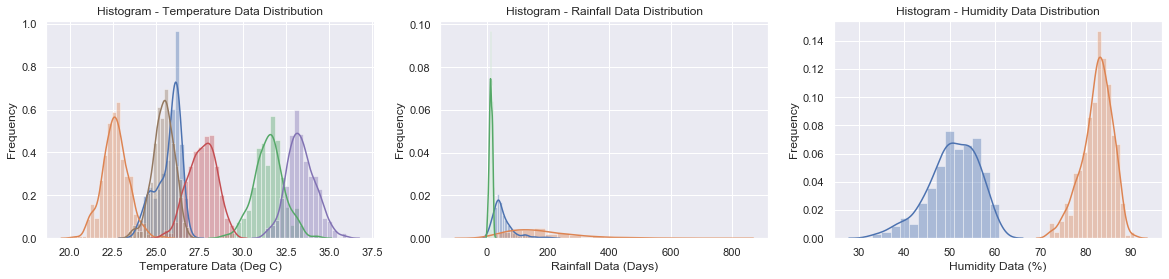

In [16]:
ncols = 3
fig, axes = plt.subplots(ncols=ncols)
fig.set_figwidth(20)

# Plot all Temperature related data for QC
sns.distplot(df_pre_proc['temp_mean_daily_min'],
             hist = True, ax=axes[0])
sns.distplot(df_pre_proc['temp_extremes_min'],
             hist = True, ax=axes[0])
sns.distplot(df_pre_proc['temp_mean_daily_max'],
             hist = True, ax=axes[0])
sns.distplot(df_pre_proc['mean_temp'],
             hist = True, ax=axes[0])
sns.distplot(df_pre_proc['max_temperature'],
             hist = True, ax=axes[0])
sns.distplot(df_pre_proc['wet_bulb_temperature'],
             hist = True, ax=axes[0])

# Plot all Rain related data for QC
sns.distplot(df_pre_proc['maximum_rainfall_in_a_day'],
             hist = True, ax=axes[1])
sns.distplot(df_pre_proc['total_rainfall'],
             hist = True, ax=axes[1])
sns.distplot(df_pre_proc['no_of_rainy_days'],
             hist = True, ax=axes[1])

# Plot all Humidity related data for QC
sns.distplot(df_pre_proc['rh_extremes_minimum'],
             hist = True, ax=axes[2])
sns.distplot(df_pre_proc['mean_rh'],
             hist = True, ax=axes[2])

for i in range(ncols):
    ax = axes[i]
    if i == 0:
        ax.set_title('Histogram - Temperature Data Distribution')
        ax.set_xlabel('Temperature Data (Deg C)')
        ax.set_ylabel('Frequency')
    if i == 1:
        ax.set_title('Histogram - Rainfall Data Distribution')
        ax.set_xlabel('Rainfall Data (Days)')
        ax.set_ylabel('Frequency')
    if i == 2:
        ax.set_title('Histogram - Humidity Data Distribution')
        ax.set_xlabel('Humidity Data (%)')
        ax.set_ylabel('Frequency')

In [17]:
# For empty Dataframe - testing purposes
# column_names = [ ]
# df = pd.DataFrame(columns = column_names)

df_pre_proc['Year-month']=pd.to_datetime(df_pre_proc['Year-month'])

df_pre_proc['month'] = df_pre_proc['Year-month'].dt.month
df_pre_proc['Year'] = df_pre_proc['Year-month'].dt.year
df_pre_proc.drop(['Year-month'], axis = 1)

,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,no_of_rainy_days,month,Year
0,26.5,21.9,29.8,25.9,31.9,5.6,25.7,36.5,107.1,49.0,81.2,10.0,1,1982
1,26.4,22.6,32.3,27.1,34.3,7.6,26.6,9.4,27.8,49.0,79.5,5.0,2,1982
2,26.7,22.3,31.7,27.2,34.3,5.1,26.1,61.7,160.8,51.0,82.3,11.0,3,1982
3,26.0,22.2,31.4,27.0,33.2,4.7,26.3,45.1,157.0,54.0,85.9,14.0,4,1982
4,26.3,23.7,31.7,28.0,32.9,5.8,26.5,33.0,102.2,57.0,83.2,10.0,5,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,25.4,22.9,32.3,28.0,34.4,5.5,25.1,73.4,137.4,45.0,79.2,15.0,11,2019
455,24.6,22.7,30.1,26.7,32.3,4.8,24.6,74.2,421.5,47.0,83.9,14.0,12,2019
456,25.2,23.8,31.7,27.7,32.8,7.1,24.7,38.0,88.4,43.0,77.9,6.0,1,2020
457,25.3,23.7,31.7,27.9,33.1,8.3,24.5,23.8,65.0,45.0,76.0,8.0,2,2020


I will create a dummy variable for number of rainy days as well; here, rather than predicting the number of rainy days per say, I will predict if the the no of rain days falls within a particular category. To do this, I will create a column called prob_rain, with the following flags:

1. Flag 0 - Total Number of Rain Days < 5
2. Flag 1 - Total Number of Rain Days between 5-15
4. Flag 2 - Total Number of Rain Days > 15

In [18]:
# Multiply by 1 to boolean array to get 1 or 0.
#df_pre_proc['Prob_rain'] = (df_pre_proc['no_of_rainy_days'] < 15)*1

m0 = df_pre_proc['no_of_rainy_days'] < 5     # 0 Flag
m1 = ((df_pre_proc['no_of_rainy_days'] >= 5) & (df_pre_proc['no_of_rainy_days'] < 10))   # 1 Flag
m2 = ((df_pre_proc['no_of_rainy_days'] >= 10) & (df_pre_proc['no_of_rainy_days'] < 15))   # 2 Flag
m3 = ((df_pre_proc['no_of_rainy_days'] >= 15) & (df_pre_proc['no_of_rainy_days'] < 20))   # 3 Flag
m4 = ((df_pre_proc['no_of_rainy_days'] >= 20)) # 4 Flag
df_pre_proc['Prob_rain'] = np.select([m0, m1, m2, m3, m4], [0, 1, 1, 2, 2]
                                    , default=2)
print(df_pre_proc.shape)
print(df_pre_proc.info())
df_pre_proc.iloc[10:20,-1]

(459, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year-month                 459 non-null    datetime64[ns]
 1   temp_mean_daily_min        459 non-null    float64       
 2   temp_extremes_min          459 non-null    float64       
 3   temp_mean_daily_max        459 non-null    float64       
 4   mean_temp                  459 non-null    float64       
 5   max_temperature            459 non-null    float64       
 6   mean_sunshine_hrs          459 non-null    float64       
 7   wet_bulb_temperature       459 non-null    float64       
 8   maximum_rainfall_in_a_day  459 non-null    float64       
 9   total_rainfall             459 non-null    float64       
 10  rh_extremes_minimum        459 non-null    float64       
 11  mean_rh                    459 non-null    float64       
 12

10    1
11    2
12    2
13    0
14    0
15    0
16    1
17    1
18    2
19    1
Name: Prob_rain, dtype: int32

Now the data set is truly ready for interpretation and use. First, lets split the data set into a training/test set and an evaluation set. The evaluation set will be treated as an "out-of-sample" set for the final model evaluation.

### Preparing the Data Sets for Predictive Modelling

In [19]:
msk = np.random.rand(len(df_pre_proc))<0.8
train_test_set = df_pre_proc[msk]
validate_set = df_pre_proc[~msk]
print(train_test_set.shape)
print(validate_set.shape)

(377, 16)
(82, 16)


#### Feature Selection on 'train_test_set'

In [20]:
Feature = train_test_set[[
    'temp_mean_daily_min', 'temp_extremes_min', 'temp_mean_daily_max', 'mean_temp', 
    'max_temperature', 'mean_sunshine_hrs', 'wet_bulb_temperature', 'maximum_rainfall_in_a_day', 
    'total_rainfall', 'rh_extremes_minimum', 'mean_rh', 'month'
]]
x=Feature
x.head()

,temp_mean_daily_min,temp_extremes_min,temp_mean_daily_max,mean_temp,max_temperature,mean_sunshine_hrs,wet_bulb_temperature,maximum_rainfall_in_a_day,total_rainfall,rh_extremes_minimum,mean_rh,month
0,26.5,21.9,29.8,25.9,31.9,5.6,25.7,36.5,107.1,49.0,81.2,1
2,26.7,22.3,31.7,27.2,34.3,5.1,26.1,61.7,160.8,51.0,82.3,3
3,26.0,22.2,31.4,27.0,33.2,4.7,26.3,45.1,157.0,54.0,85.9,4
4,26.3,23.7,31.7,28.0,32.9,5.8,26.5,33.0,102.2,57.0,83.2,5
5,26.5,23.1,31.9,28.4,33.3,7.3,25.8,20.6,59.5,53.0,80.3,6


#### Label data for Machine Learning

In [21]:
y = train_test_set['no_of_rainy_days'].values
print(y[0:5])
print(x.shape, y.shape)

[10. 11. 14. 10.  8.]
(377, 12) (377,)


In [22]:
y_bool = train_test_set['Prob_rain'].values
print(y_bool[0:5])
print(y_bool.shape)

[1 1 1 1 1]
(377,)


Now I split the 'train_test_set' into a training and testing set. I will do this with a 70-30 split.

In [23]:
from sklearn.model_selection import train_test_split

random_state = 42
test_size = 0.3

x_train, x_test, y_train, y_test  = train_test_split(
            x, y, test_size = test_size, random_state = random_state
)

print('Train Set: ', x_train.shape, y_train.shape)
print(x_train['temp_mean_daily_min'][0:2])
print('Test Set: ', x_test.shape, y_test.shape)
print(x_test['temp_mean_daily_min'][0:2])

Train Set:  (263, 12) (263,)
453    25.3
337    25.5
Name: temp_mean_daily_min, dtype: float64
Test Set:  (114, 12) (114,)
348    23.5
312    24.3
Name: temp_mean_daily_min, dtype: float64


In [24]:

x_train, x_test, y_train_bool, y_test_bool  = train_test_split(
            x, y_bool, test_size = test_size, random_state = random_state
)

print('Train Set: ', x_train.shape, y_train_bool.shape)
print(x_train['temp_mean_daily_min'][0:2])
print('Test Set: ', x_test.shape, y_test_bool.shape)
print(x_test['temp_mean_daily_min'][0:2])

Train Set:  (263, 12) (263,)
453    25.3
337    25.5
Name: temp_mean_daily_min, dtype: float64
Test Set:  (114, 12) (114,)
348    23.5
312    24.3
Name: temp_mean_daily_min, dtype: float64


#### Normalize Data to give zero mean and unit variance. 

This is only done to the features

In [25]:
X_train=preprocessing.StandardScaler().fit(x_train).transform(x_train)
X_test=preprocessing.StandardScaler().fit(x_test).transform(x_test)
print('Normalized X Training Set: ', X_train[0:5])
print('Normalized X Testing Set: ', X_test[0:5])

Normalized X Training Set:  [[-5.26338416e-01  3.23464462e-01  1.28179094e+00  5.30910716e-01
   1.15583320e+00  6.14105425e-01 -4.86438450e-01  1.11054789e+00
   1.39908895e-03 -2.20487837e+00 -1.25371888e+00  1.06047406e+00]
 [-2.54379667e-01  1.51419600e+00  2.16514768e+00  1.52119099e+00
   2.09009099e+00  2.41999931e+00  3.37874130e-01 -1.37949628e+00
  -1.49590992e+00 -6.37626988e-01 -1.48620826e+00 -1.24690693e+00]
 [ 5.61496581e-01  2.30801703e+00  1.94430850e+00  1.52119099e+00
   1.97330877e+00  1.00669105e+00  1.65677426e+00 -9.55658978e-01
  -1.04979087e+00 -8.11766031e-01 -3.31496266e-02 -6.70061684e-01]
 [-1.47819404e+00 -8.67267079e-01 -3.74502954e-01  2.83340648e-01
  -3.62335723e-01 -2.49582953e-01  5.02736646e-01  2.18258825e-01
  -1.60187337e-01 -1.15209861e-01  5.19012654e-01  4.83628809e-01]
 [ 9.69434705e-01  2.17571353e+00  1.72346931e+00  1.52119099e+00
   1.38939765e+00  2.49851643e+00  8.32461678e-01 -1.12853998e+00
  -1.26582490e+00 -1.15209861e-01 -1.1955965

#### Pickle the Models

In [26]:
# Pickle all the training (post normalization) 
# and testing data sets
with open('X_train', 'wb') as file:
    pickle.dump(X_train, file)
with open('X_test', 'wb') as file:
    pickle.dump(X_test, file)
with open('y_train', 'wb') as file:
    pickle.dump(y_train, file)
with open('y_test', 'wb') as file:
    pickle.dump(y_test, file)
with open('y_train_bool', 'wb') as file:
    pickle.dump(y_train_bool, file)
with open('y_test_bool', 'wb') as file:
    pickle.dump(y_test_bool, file)
with open('validate_set', 'wb') as file:
    pickle.dump(validate_set, file)

In [27]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

Completed Process in 1.2021379470825195 seconds
